In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from scipy import optimize
from scipy import stats

In [4]:
Npoints, Nsampling = 20, 1000
xcont = np.linspace(-5.0, 3.5, Nsampling)
x = np.linspace(-5, 3.0, Npoints)
y = 2*(np.sin(x/2)**2 + np.random.random(Npoints)*0.3)
dy = np.sqrt(0.10**2 + (0.10*y)**2)

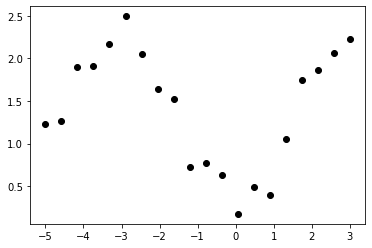

In [8]:
plt.plot(x, y, 'o', color='black');

In [9]:
def pol1(x, p0, p1):
    return p0 + x*p1

p, cov = optimize.curve_fit(pol1, x, y, sigma=dy)

In [10]:
p

array([ 0.93640559, -0.09257575])

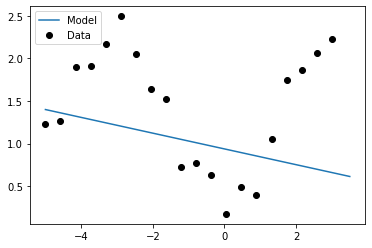

In [14]:
yModel = pol1(xcont, *p)
plt.plot(xcont, yModel, label='Model')
plt.plot(x, y, 'o', color='black', label='Data')
plt.legend();

In [23]:
def pol_func(x, *coeff):
    '''Arbitrary degree polynom: f(x) = a0 + a1*x + a2*x^2 + ... aN*x^N'''
    a = np.array([coeff[i]*x**i for i in range(len(coeff))])
    return np.sum(a)

pol_func = np.vectorize(pol_func)

In [29]:
def fit_polynom(degree):
    
    # Number of parameters
    nPars = degree+1
    
    # Initial parameters and ranges
    p0, pmin, pmax = [1.0]*nPars, [-10]*nPars, [10]*nPars
    
    # Fit options
    fit_options = {'p0': p0, 'bounds': (pmin, pmax), 'check_finite': True}
    
    # Doing the fit
    par, cov = optimize.curve_fit(pol_func, x, y, sigma=dy, **fit_options)
    
    # Returning the result
    return par, cov

def plotModel(*p):
    yModel = pol_func(xcont, *p)
    plt.plot(xcont, yModel, label='Model')
    plt.plot(x, y, 'o', color='black', label='Data')
    plt.legend();
    plt.ylim(0, 3)

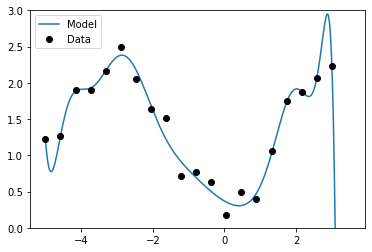

In [30]:
p, cov = fit_polynom(14)
plotModel(*p)

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Disable some warning due to the tool evolution
import warnings
warnings.simplefilter("ignore", category=FutureWarning)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [32]:
# Skip the first 15 lines, rename the column and specify the type of data (float)
filePath = '../data/pulse.csv'
df = pd.read_csv(filePath, skiprows=15, names=['T', 'V'], dtype=np.float64)

# Display the first 10 rows
df.head(10)

,T,V
0,-4.000000e-08,-0.437750
1,-3.960000e-08,-0.437547
2,-3.920000e-08,-0.437109
3,-3.880000e-08,-0.437016
4,-3.840000e-08,-0.436938
5,-3.800000e-08,-0.436781
6,-3.760000e-08,-0.436422
7,-3.720000e-08,-0.437000
8,-3.680000e-08,-0.437750
9,-3.640000e-08,-0.439312


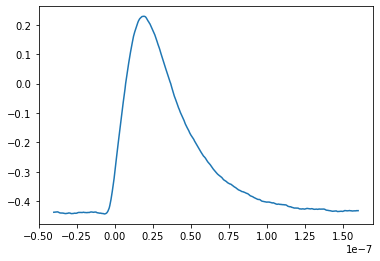

In [34]:
plt.plot(df['T'], df['V']);

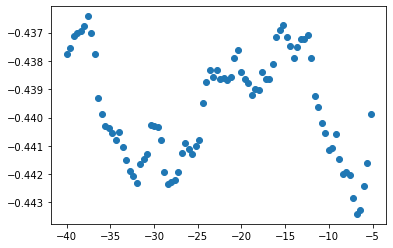

In [55]:
df['Tns'] = df['T'] * 10**9

pData = df[df['Tns']<-5]
plt.plot(pData['Tns'], pData['V'], 'o');

In [58]:
pedestal = np.mean(pData['V'])

In [57]:
ths = np.linspace(-40, 0, 500)
pTest = []
for th in ths:
    pTest.append(np.mean(df['V'][df['Tns']<th]))

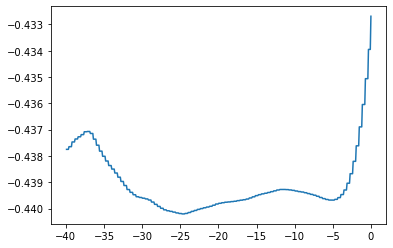

In [54]:
plt.plot(ths, np.array(pTest));

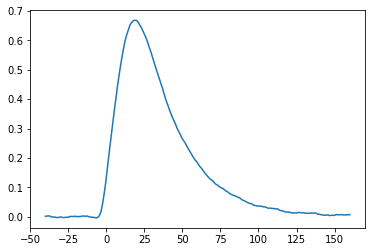

In [60]:
df['Vsub'] = df['V'] - pedestal
plt.plot(df['Tns'], df['Vsub'])

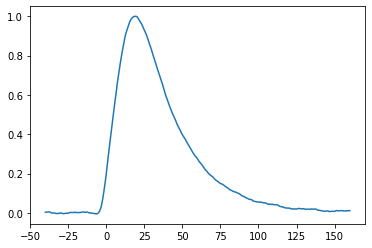

In [61]:
df['Vnorm'] = df['Vsub'] / np.max(df['Vsub'])
plt.plot(df['Tns'], df['Vnorm'])

In [62]:
V = df['Vnorm'].values
T = df['Tns'].values

In [65]:
T[np.argmax(V)]

18.8

(0.9, 1.05)

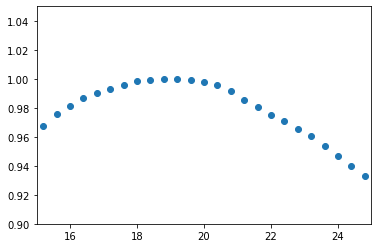

In [68]:
plt.plot(df['Tns'], df['Vnorm'], 'o')
plt.xlim(15, 25)
plt.ylim(0.9, 1.05)